In [4]:
pip install -r requerimento.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 23.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 47.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 37.9 MB/s eta 0:00:0000

In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [5]:
df = pd.read_csv('/workspaces/NLP_e_vida/IMDB Dataset.csv')

NameError: name 'pandas' is not defined

In [ ]:
import re
def clean_review(text):
    return re.sub(r'<br\s*/?>', '', text)

# Aplicar a função a todas as resenhas na coluna 'review'
df['review'] = df['review'].apply(clean_review)

# Exibir as primeiras linhas do DataFrame para verificar
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. The filming tec...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
# Visualizar informações do dataframe
print(df.info())

# Visualizar a distribuição das classes
print(df['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


                                                   review sentiment
count                                               50000     50000
unique                                              49581         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


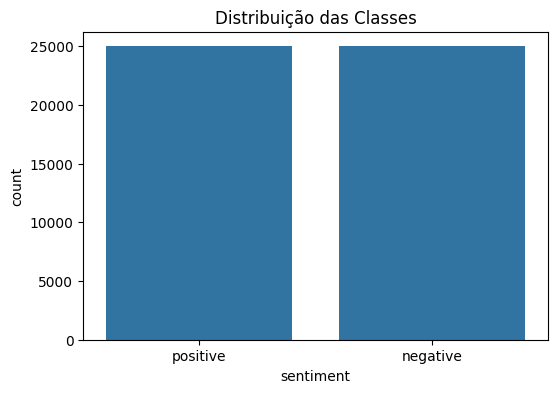

In [ ]:
print(df.describe())
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribuição das Classes')
plt.show()

count    50000.000000
mean      1285.197260
std        971.156747
min         32.000000
25%        689.000000
50%        953.000000
75%       1559.000000
max      13584.000000
Name: review_length, dtype: float64


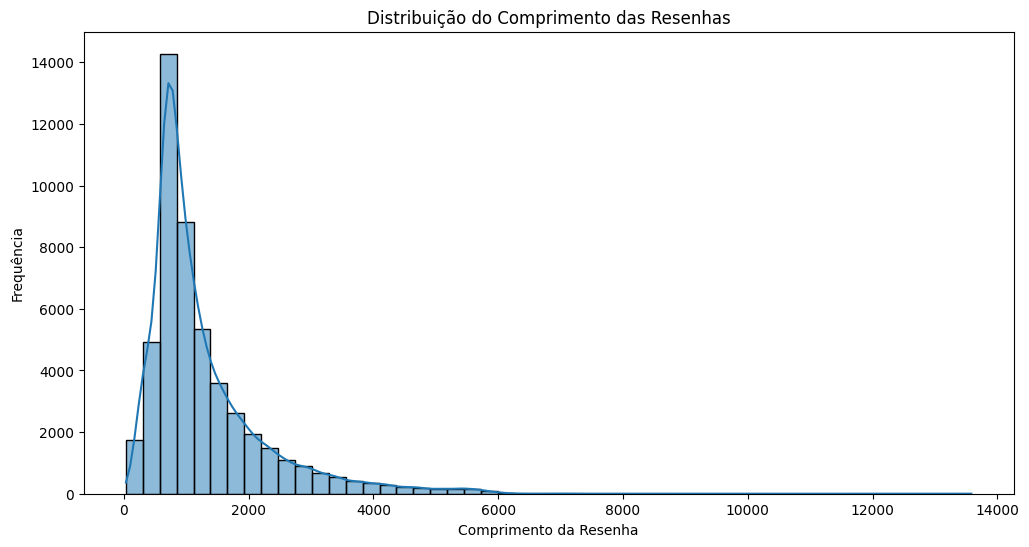

In [ ]:
df['review_length'] = df['review'].apply(len)

# Estatísticas descritivas dos comprimentos das resenhas
print(df['review_length'].describe())

# Plotar a distribuição do comprimento das resenhas
plt.figure(figsize=(12,6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribuição do Comprimento das Resenhas')
plt.xlabel('Comprimento da Resenha')
plt.ylabel('Frequência')
plt.show()

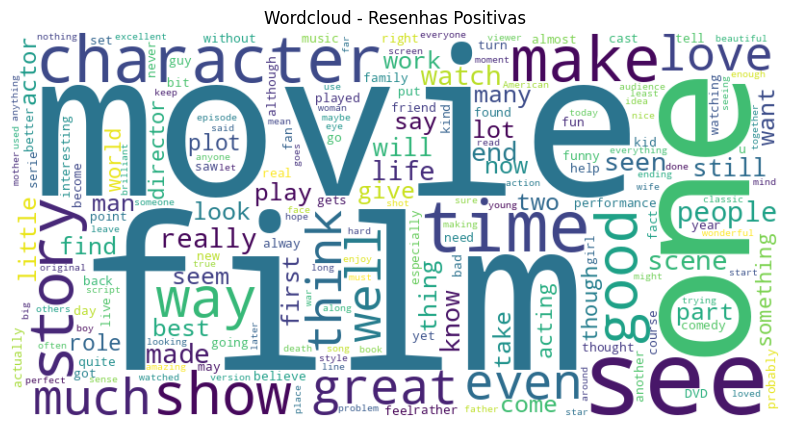

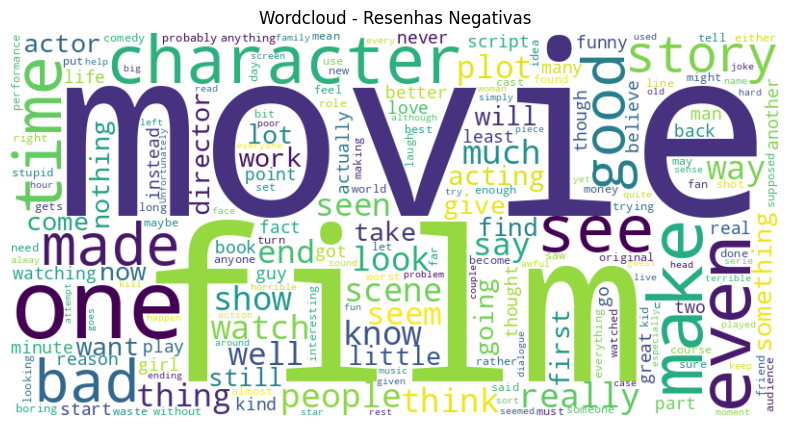

In [ ]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Resenhas positivas e negativas
positive_reviews = ' '.join(df[df['sentiment']=='positive']['review'])
negative_reviews = ' '.join(df[df['sentiment']=='negative']['review'])

# Wordcloud para resenhas positivas
plot_wordcloud(positive_reviews, 'Wordcloud - Resenhas Positivas')

# Wordcloud para resenhas negativas
plot_wordcloud(negative_reviews, 'Wordcloud - Resenhas Negativas')

In [ ]:
dfDois = pd.read_csv('/content/drive/MyDrive/imdb-reviews-pt-br.csv')

In [ ]:
dfDois.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [ ]:
dfDois['sentiment'] = dfDois['sentiment'].replace({'neg': 'negative', 'pos': 'positive'})
dfDois = dfDois.drop(columns=['text_pt'])
dfDois = dfDois.drop(columns=['id'])
dfDois = dfDois.rename(columns={'text_en': 'review'})

In [ ]:
# Visualizar informações do dataframe
print(dfDois.info())

# Visualizar a distribuição das classes
print(dfDois['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49459 entries, 0 to 49458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49459 non-null  object
 1   sentiment  49459 non-null  object
dtypes: object(2)
memory usage: 772.9+ KB
None
sentiment
negative    24765
positive    24694
Name: count, dtype: int64


                                                   review sentiment
count                                               49459     49459
unique                                              49043         2
top     Loved todays show!!! It was a variety and not ...  negative
freq                                                    5     24765


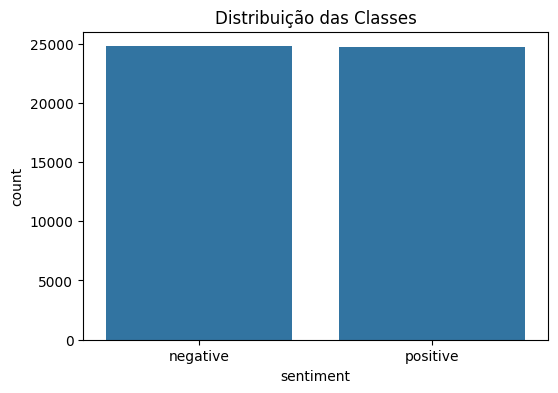

In [ ]:
print(dfDois.describe())
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=dfDois)
plt.title('Distribuição das Classes')
plt.show()

count    49459.000000
mean      1228.475283
std        852.181841
min         32.000000
25%        683.000000
50%        939.000000
75%       1517.000000
max       5000.000000
Name: review_length, dtype: float64


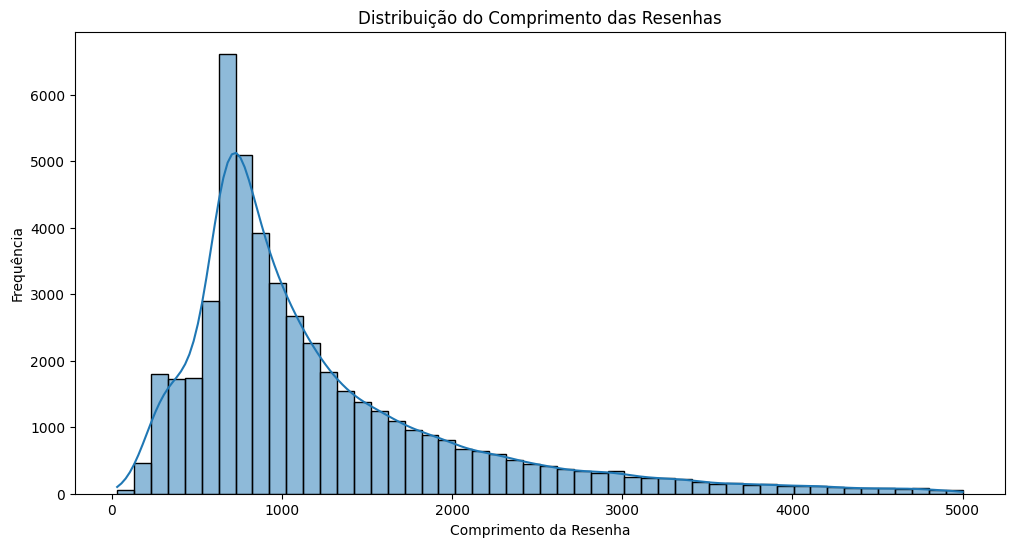

In [ ]:
dfDois['review_length'] = dfDois['review'].apply(len)

# Estatísticas descritivas dos comprimentos das resenhas
print(dfDois['review_length'].describe())

# Plotar a distribuição do comprimento das resenhas
plt.figure(figsize=(12,6))
sns.histplot(dfDois['review_length'], bins=50, kde=True)
plt.title('Distribuição do Comprimento das Resenhas')
plt.xlabel('Comprimento da Resenha')
plt.ylabel('Frequência')
plt.show()

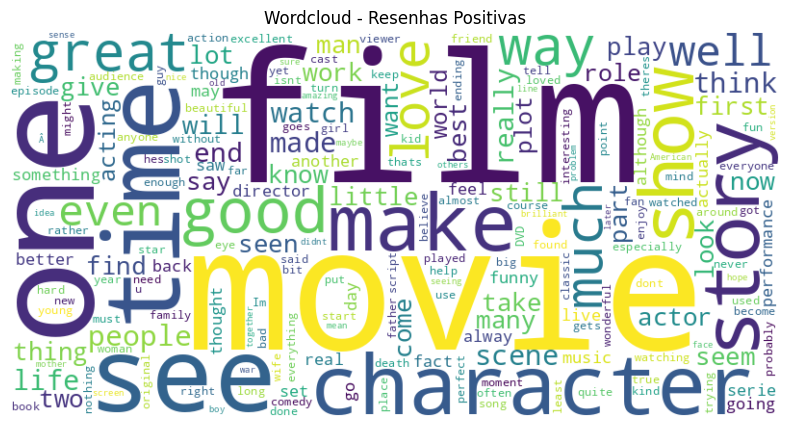

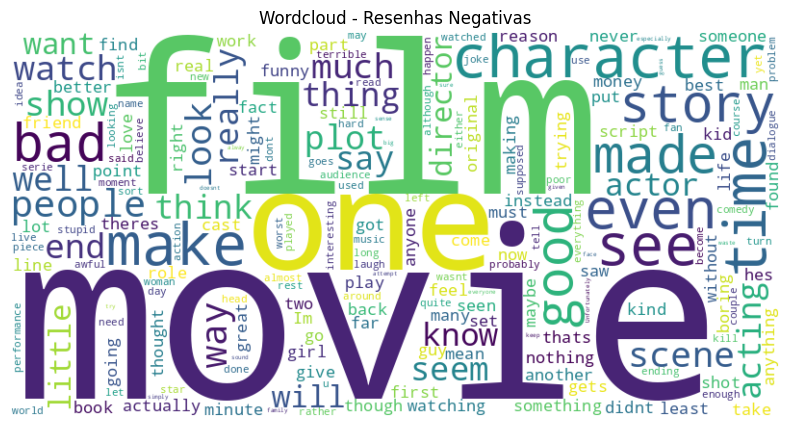

In [ ]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Resenhas positivas e negativas
positive_reviews = ' '.join(dfDois[dfDois['sentiment']=='positive']['review'])
negative_reviews = ' '.join(dfDois[dfDois['sentiment']=='negative']['review'])

# Wordcloud para resenhas positivas
plot_wordcloud(positive_reviews, 'Wordcloud - Resenhas Positivas')

# Wordcloud para resenhas negativas
plot_wordcloud(negative_reviews, 'Wordcloud - Resenhas Negativas')

In [ ]:
def get_imdb_reviews(movie_id):
    url = f"https://www.imdb.com/title/{movie_id}/reviews"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        return f"HTTP Error: {response.status_code}"

    soup = BeautifulSoup(response.content, 'html.parser')
    reviews = soup.find_all('div', class_='text show-more__control')

    if not reviews:
        return "No reviews found or scraping is blocked."

    reviews_list = [review.get_text() for review in reviews]
    return reviews_list


def plot_sentiment_distribution(movie_title, sentiments):
    plt.figure(figsize=(6,4))
    plt.hist(sentiments, bins=3, edgecolor='black')
    plt.title(f"Sentiment Distribution for {movie_title}")
    plt.xlabel("Sentiment")
    plt.ylabel("Frequency")
    plt.xticks([0, 1], ['Negative', 'Positive'])
    plt.show()


    # Carregar o dataset de treino


    # Pré-processamento dos dados
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
dfDois['sentiment'] = dfDois['sentiment'].map({'positive': 1, 'negative': 0})

X_train = df['review']
y_train = df['sentiment']

    # Separar features e labels para teste
X_test = dfDois['review']
y_test = dfDois['sentiment']

    # Criar um pipeline de vetorização e modelo
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

    # Treinar o modelo
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {accuracy:.2%}')

In [ ]:
movie_ids = {
        "Diário de uma Paixão": "tt0332280",
        "Forrest Gump": "tt0109830",
        "Batman: O Cavaleiro das Trevas": "tt0468569"
}

Acurácia no conjunto de teste: 89.70%
Reviews for Diário de uma Paixão:


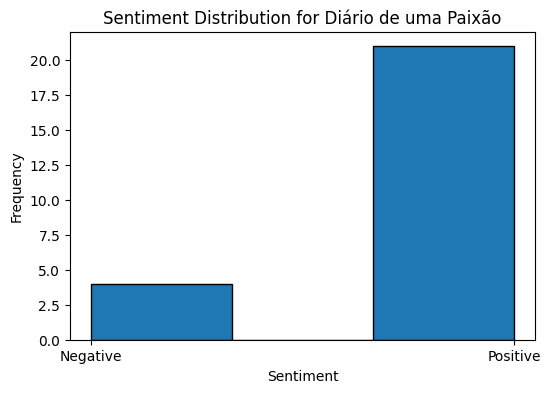

Reviews for Forrest Gump:


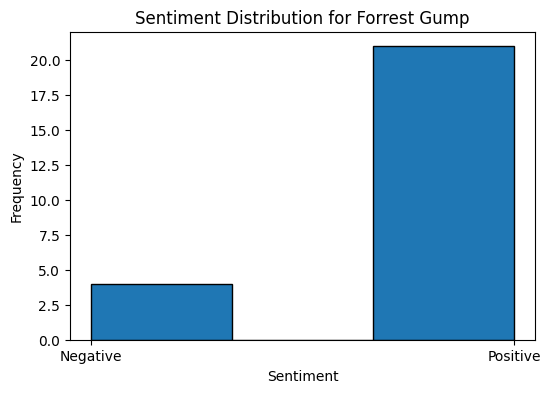

Reviews for Batman: O Cavaleiro das Trevas:


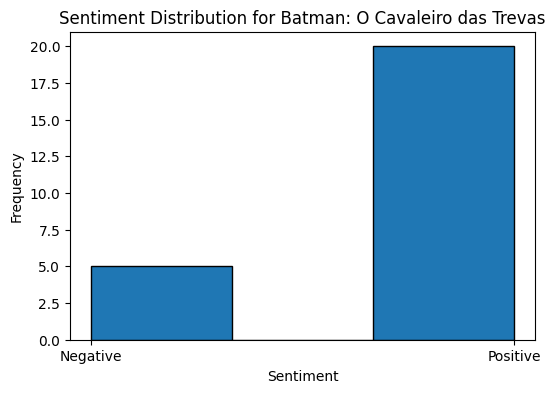

Reviews for Diário de uma Paixão:
Review 1:
"The Notebook" is an American 2-hour movie from 2004, so this one is also already way over a decade old now. It is considered to be a defining movie of the 21st century when it comes to romance, heart-throb and cheering for the characters to become a couple. Lead actors Gosling and McAdams were a couple themselves back then and their performances in this movie made it possibly hard to believe that they split up sooner than later. Many still remember that kiss at the MTV Movie Awards as something truly special that no other awards show from that year had to offer. But first things first: The director is Nick Cassavetes and he is the son of Gena Rowlands who plays a major supporting character here. Another major supporting character is played by the late James Garner. He received an SAG Award nomination for his portrayal and this may have been the closest he ever got to becoming an Oscar nominee, at the tender age of 75 and after almost 50 year

In [ ]:
def main():

  for movie_title, movie_id in movie_ids.items():
        print(f"Reviews for {movie_title}:")
        reviews = get_imdb_reviews(movie_id)

        if isinstance(reviews, list):
            sentiments = []
            for review in reviews:
                sentiment = model.predict([review])[0]
                sentiments.append(sentiment)

            # Plot the sentiment distribution
            plot_sentiment_distribution(movie_title, sentiments)
        else:
            print(reviews)

  for movie_title, movie_id in movie_ids.items():
        print(f"Reviews for {movie_title}:")
        reviews = get_imdb_reviews(movie_id)

        if isinstance(reviews, list):
            for i, review in enumerate(reviews, start=1):
                sentiment = model.predict([review])[0]
                sentiment_str = 'positive' if sentiment == 1 else 'negative'
                print(f"Review {i}:")
                print(review)
                print(f"Sentiment: {sentiment_str}")
                print("-" * 80)
        else:
            print(reviews)
        print("=" * 80)

if __name__ == "__main__":
    main()